In [2]:
import csv
import numpy as np

In [3]:
DATA_FILE = './data/single-var.csv'
data = np.genfromtxt (DATA_FILE, delimiter=",")

In [8]:
data

array([[ 4.94,  4.37],
       [-1.58,  1.7 ],
       [-4.45,  1.88],
       [-6.06,  0.56],
       [-1.22,  2.23],
       [-3.55,  1.53],
       [ 0.36,  2.99],
       [-3.24,  0.48],
       [ 1.31,  2.76],
       [ 2.17,  3.99],
       [ 2.94,  3.25],
       [-0.92,  2.27],
       [-0.91,  2.  ],
       [ 1.24,  4.75],
       [ 1.56,  3.52],
       [-4.14,  1.39],
       [ 3.75,  4.9 ],
       [ 4.15,  4.44],
       [ 0.33,  2.72],
       [ 3.41,  4.59],
       [ 2.27,  5.3 ],
       [ 2.6 ,  3.43],
       [ 1.06,  2.53],
       [ 1.04,  3.69],
       [ 2.74,  3.1 ],
       [-0.71,  2.72],
       [-2.75,  2.82],
       [ 0.55,  3.53],
       [-3.45,  1.77],
       [ 1.09,  4.61],
       [ 2.47,  4.24],
       [-6.35,  1.  ],
       [ 1.83,  3.84],
       [-0.68,  2.42],
       [-3.83,  0.67],
       [-2.03,  1.07],
       [ 3.13,  3.19],
       [ 0.92,  4.21],
       [ 4.02,  5.24],
       [ 3.89,  3.94],
       [-1.81,  2.85],
       [ 3.94,  4.86],
       [-2.  ,  1.31],
       [ 0.

In [11]:
data[0]

array([ 4.94,  4.37])

In [12]:
data[:, 0]

array([ 4.94, -1.58, -4.45, -6.06, -1.22, -3.55,  0.36, -3.24,  1.31,
        2.17,  2.94, -0.92, -0.91,  1.24,  1.56, -4.14,  3.75,  4.15,
        0.33,  3.41,  2.27,  2.6 ,  1.06,  1.04,  2.74, -0.71, -2.75,
        0.55, -3.45,  1.09,  2.47, -6.35,  1.83, -0.68, -3.83, -2.03,
        3.13,  0.92,  4.02,  3.89, -1.81,  3.94, -2.  ,  0.54,  0.78,
        2.15,  2.55, -0.63,  1.06, -0.36])

## Train-test split

In [29]:
len(data)

50

In [30]:
nb_training = int(0.8 * len(data))

In [31]:
x_train = data[:nb_training, 0]
y_train = data[:nb_training, 1]

In [32]:
x_test = data[nb_training:, 0]
y_test = data[nb_training:, 1]

## Better train-test split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:,1], test_size=0.25, random_state=42 )

In [54]:
X_train

array([ 1.31, -6.06,  0.36,  3.94,  2.55, -0.63, -4.14,  2.17,  3.75,
        2.74, -3.83, -6.35,  4.94,  0.78,  0.55, -0.68, -3.55,  1.09,
       -0.92,  3.13, -1.58,  2.6 , -4.45,  0.54, -2.03,  1.04, -1.81,
        2.94,  1.06,  0.33, -0.36,  2.27, -3.24, -2.  ,  1.56, -3.45,  4.02])

## Training the model

In [55]:
from sklearn import linear_model
linear_regressor = linear_model.LinearRegression()

In [57]:
X_train = X_train.reshape(-1, 1)

In [58]:
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plot

In [59]:
import matplotlib.pyplot as plt

In [60]:
y_pred = linear_regressor.predict(X_train)

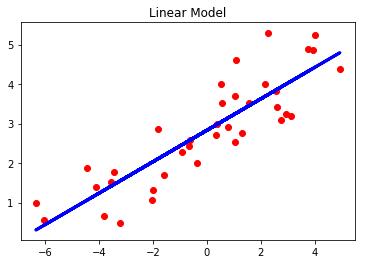

In [63]:
fig, ax = plt.subplots()
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred, color='blue', linewidth=3)
plt.title('Linear Model')
plt.show()

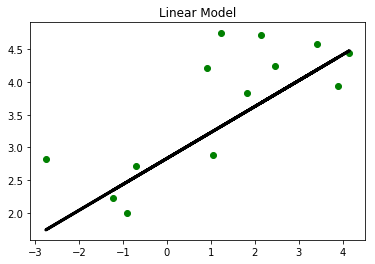

In [66]:
y_pred = linear_regressor.predict(X_test.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('Linear Model')
plt.show()

## Metrics

In [70]:
import sklearn.metrics as sm

print 'Mean absolute error =', round(sm.mean_absolute_error(y_test, y_pred), 2)
print 'Mean squared error =', round(sm.mean_squared_error(y_test, y_pred), 2)
print 'Median absolute error =', round(sm.median_absolute_error(y_test, y_pred), 2)
print 'Explain variance score =', round(sm.explained_variance_score(y_test, y_pred), 2)
print 'R2 score =', round(sm.r2_score(y_test, y_pred), 2)

Mean absolute error = 0.56
Mean squared error = 0.49
Median absolute error = 0.43
Explain variance score = 0.58
R2 score = 0.45


## Saving/Loading Models

In [76]:
import pickle as pickle

output_model_file = '03-model_linear_regr.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test.reshape(-1,1))
print 'New mean absolute error =', round(sm.mean_absolute_error(y_test, y_pred), 2)


New mean absolute error = 0.56
